# Project 3: Predictive modeling
*University of Ljubljana, Faculty for computer and information science* <br />
*Course: Introduction to data science*

In this Jupyter notebook you should document all the analyses (tables, figures, models) you have perfomed to write your report.

All the code in the notebook must be reproducible and runnable, so include instructions for the environment setup or other specifics needed to run the notebook.

## Environment setup

Write instructions how to setup the environment to run this notebook, which libraries are installed, etc. Also provide installation sources.

`ENVIRONMENT SETUP:

- conda create --name project_3

- conda install python=3.7

- conda install jupyter notebook

- ipython kernel install --name project_3 --user

- conda install pandas

- conda install numpy

- conda install matplotlib

- conda install scipy

- conda install seaborn

- conda install scikit-learn`

In [1]:
# Load all the libraries needed for running the code chunks below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB





os. getcwd() #get current work dir

'C:\\Users\\zaloz\\Desktop\\exFMF\\upd\\project-3-databox-ZaloznikV'

# Modeling

Your main task is to provide insights into the data to the reader through text, tables, models and visualizations. Aim for a concise, efficient, and effective solution.

In [2]:
signups = pd.read_csv("Data\signups\SignupsAttributes.csv")
events = pd.read_csv("Data\events\AllEvents.csv", error_bad_lines=False) #automatically ignoring headers in all_events csv file
#print(signups.head())
#events.head()

C:\Users\zaloz\anaconda3\envs\project_3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 7878587: expected 4 fields, saw 7\nSkipping line 7888587: expected 4 fields, saw 9\nSkipping line 7898587: expected 4 fields, saw 7\nSkipping line 7918587: expected 4 fields, saw 7\nSkipping line 7928587: expected 4 fields, saw 7\nSkipping line 7938587: expected 4 fields, saw 7\n'


In [3]:
signups.describe(include="all")


,$distinct_id,$properties.space_id,$properties.country,$properties.is_agency,$properties.company_created,$properties.became_paying,$properties.became_pql,$properties.cancelled,$properties.had_trial,$properties.trial_features,...,$properties.level_achieved,$properties.has_mobile_company,$properties.sessions_company,$properties.databoards_company,$properties.cloud_sources_company,$properties.metrics_company,$properties.users_in_space,$properties.scheduled_snapshots_company,$properties.custom_queries_company,$properties.scripts_company
count,101698.000000,101698.000000,101698,101698,101698,101698,101698,101698,101698,101137,...,101698,101698,101698.000000,101698.000000,101698.000000,101698.000000,101698.000000,101698.000000,101698.000000,101698.000000
unique,NaN,NaN,307,2,94805,2816,9994,1155,2,259,...,5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,United States,False,2020-12-03T12:51:00,undefined,undefined,undefined,False,undefined,...,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,25502,86645,19,98748,91187,100542,83678,83795,...,44611,93584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,209132.380568,209132.380568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,15.676316,1.094535,1.172294,3.985113,1.131291,0.044131,0.846437,0.363173
std,39480.787415,39480.787415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,88.293682,3.083744,2.708625,9.701362,0.755802,0.383822,12.146176,5.919391
min,142846.000000,142846.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,174966.250000,174966.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,207723.500000,207723.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,242016.750000,242016.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.000000,1.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000


In [4]:
signups.head()

,$distinct_id,$properties.space_id,$properties.country,$properties.is_agency,$properties.company_created,$properties.became_paying,$properties.became_pql,$properties.cancelled,$properties.had_trial,$properties.trial_features,...,$properties.level_achieved,$properties.has_mobile_company,$properties.sessions_company,$properties.databoards_company,$properties.cloud_sources_company,$properties.metrics_company,$properties.users_in_space,$properties.scheduled_snapshots_company,$properties.custom_queries_company,$properties.scripts_company
0,142868,142868,South Africa,True,2019-11-29T11:30:00,undefined,undefined,undefined,False,undefined,...,undefined,False,1,0,1,9,1,0,0,0
1,143012,143012,Canada,False,2019-11-30T22:14:00,undefined,undefined,undefined,False,undefined,...,0,False,7,1,3,37,1,0,0,0
2,143074,143074,Spain,False,2019-12-01T17:24:00,2020-02-09T22:49:00,2019-12-02T18:05:00,undefined,True,More Data Sources; More Databoards,...,3,True,979,10,10,7,4,19,0,0
3,143438,143438,France,False,2019-12-03T14:02:00,undefined,undefined,undefined,False,undefined,...,undefined,False,2,0,0,0,1,0,0,0
4,144226,144226,Italy,False,2019-12-07T19:03:00,undefined,undefined,undefined,False,undefined,...,0,False,1,1,1,13,1,0,0,0


### Data cleaning

In [5]:
"""JOINING BOTH TABLES TOGATHER"""

unique_attributes = list(pd.unique(events["Event"])) #all parameters
unique_attributes
Dict = {}
for name in unique_attributes:
    print("Working on: ", name )
    foo = events[events["Event"] == name]
    foo = foo[["Space", "Event_count"]]
    foo = foo[foo["Space"] != "undefined"]
    Dict[name] = foo.groupby(["Space"], as_index=False).sum()
#Dict   

Working on:  _Calculation created - Total
Working on:  _Metric created - Total
Working on:  _New connection added - Total
Working on:  _New user added - Total
Working on:  _Query created - Total
Working on:  _Share new snapshot - Total
Working on:  _Share public url by copy/paste - Total
Working on:  sessions - Total


In [6]:
list(Dict.keys())

['_Calculation created - Total',
 '_Metric created - Total',
 '_New connection added - Total',
 '_New user added - Total',
 '_Query created - Total',
 '_Share new snapshot - Total',
 '_Share public url by copy/paste - Total',
 'sessions - Total']

In [7]:
data = signups
for col_name in list(Dict.keys()):
    test = Dict[col_name]
    test.rename(columns={"Event_count": col_name}, inplace=True)
    test = test.astype({"Space": int})
    data = data.merge(test, how='left', left_on='$distinct_id', right_on='Space')
    data = data.drop(['Space'], axis=1)
    
data = data.drop(['$properties.space_id'], axis=1) #dropping doubling columns



In [8]:
"""some more preprocessing"""


colnames = list(data.columns)
colnames = [s.replace("$properties.", "") for s in colnames]
colnames = [s.replace(" - Total", "") for s in colnames]

colnames = [s[1:] if s[0] in ["$", "_"] else s for s in colnames ]
colnames = [s.replace(" ", "_") for s in colnames]
data.columns = colnames

data.head()

,distinct_id,country,is_agency,company_created,became_paying,became_pql,cancelled,had_trial,trial_features,is_activated,...,custom_queries_company,scripts_company,Calculation_created,Metric_created,New_connection_added,New_user_added,Query_created,Share_new_snapshot,Share_public_url_by_copy/paste,sessions
0,142868,South Africa,True,2019-11-29T11:30:00,undefined,undefined,undefined,False,undefined,True,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,143012,Canada,False,2019-11-30T22:14:00,undefined,undefined,undefined,False,undefined,True,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,143074,Spain,False,2019-12-01T17:24:00,2020-02-09T22:49:00,2019-12-02T18:05:00,undefined,True,More Data Sources; More Databoards,True,...,0,0,NaN,5.0,19.0,5.0,NaN,29.0,52.0,904.0
3,143438,France,False,2019-12-03T14:02:00,undefined,undefined,undefined,False,undefined,False,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,144226,Italy,False,2019-12-07T19:03:00,undefined,undefined,undefined,False,undefined,True,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
"""Changing boolean columns to numerical"""
dtypes = dict(data.dtypes)
for cn in list(dtypes.keys()):
    if dtypes[cn].name == "bool":
        #print(cn)
        r = data[cn].astype(int)
        data[cn] = r
data.head()

,distinct_id,country,is_agency,company_created,became_paying,became_pql,cancelled,had_trial,trial_features,is_activated,...,custom_queries_company,scripts_company,Calculation_created,Metric_created,New_connection_added,New_user_added,Query_created,Share_new_snapshot,Share_public_url_by_copy/paste,sessions
0,142868,South Africa,1,2019-11-29T11:30:00,undefined,undefined,undefined,0,undefined,1,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,143012,Canada,0,2019-11-30T22:14:00,undefined,undefined,undefined,0,undefined,1,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,143074,Spain,0,2019-12-01T17:24:00,2020-02-09T22:49:00,2019-12-02T18:05:00,undefined,1,More Data Sources; More Databoards,1,...,0,0,NaN,5.0,19.0,5.0,NaN,29.0,52.0,904.0
3,143438,France,0,2019-12-03T14:02:00,undefined,undefined,undefined,0,undefined,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,144226,Italy,0,2019-12-07T19:03:00,undefined,undefined,undefined,0,undefined,1,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data.groupby("level_achieved").count() #cleaning some undefined data in level_achieved column
data[["level_achieved"]] = data[["level_achieved"]]. replace("undefined", 0)
data["level_achieved"] = data["level_achieved"].astype(int)
data.groupby("level_achieved").count()


,distinct_id,country,is_agency,company_created,became_paying,became_pql,cancelled,had_trial,trial_features,is_activated,...,custom_queries_company,scripts_company,Calculation_created,Metric_created,New_connection_added,New_user_added,Query_created,Share_new_snapshot,Share_public_url_by_copy/paste,sessions
level_achieved,,,,,,,,,,,,,,,,,,,,,
0,87994,87994,87994,87994,87994,87994,87994,87994,87711,87994,...,87994,87994,953,1816,1025,1835,2122,1156,1202,1082
1,10934,10934,10934,10934,10934,10934,10934,10934,10765,10934,...,10934,10934,1274,4149,1467,1632,1470,1336,1394,1718
2,1947,1947,1947,1947,1947,1947,1947,1947,1872,1947,...,1947,1947,872,978,1043,1772,926,531,815,1182
3,823,823,823,823,823,823,823,823,789,823,...,823,823,499,512,612,778,507,582,449,666


In [11]:
data.dtypes

distinct_id                         int64
country                            object
is_agency                           int32
company_created                    object
became_paying                      object
became_pql                         object
cancelled                          object
had_trial                           int32
trial_features                     object
is_activated                        int32
level_achieved                      int32
has_mobile_company                  int32
sessions_company                    int64
databoards_company                  int64
cloud_sources_company               int64
metrics_company                     int64
users_in_space                      int64
scheduled_snapshots_company         int64
custom_queries_company              int64
scripts_company                     int64
Calculation_created               float64
Metric_created                    float64
New_connection_added              float64
New_user_added                    

In [12]:
data = data.fillna(0) #replace all NaN values with zero (only values in added columns)
data.head()

,distinct_id,country,is_agency,company_created,became_paying,became_pql,cancelled,had_trial,trial_features,is_activated,...,custom_queries_company,scripts_company,Calculation_created,Metric_created,New_connection_added,New_user_added,Query_created,Share_new_snapshot,Share_public_url_by_copy/paste,sessions
0,142868,South Africa,1,2019-11-29T11:30:00,undefined,undefined,undefined,0,undefined,1,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,143012,Canada,0,2019-11-30T22:14:00,undefined,undefined,undefined,0,undefined,1,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,143074,Spain,0,2019-12-01T17:24:00,2020-02-09T22:49:00,2019-12-02T18:05:00,undefined,1,More Data Sources; More Databoards,1,...,0,0,0.0,5.0,19.0,5.0,0.0,29.0,52.0,904.0
3,143438,France,0,2019-12-03T14:02:00,undefined,undefined,undefined,0,undefined,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,144226,Italy,0,2019-12-07T19:03:00,undefined,undefined,undefined,0,undefined,1,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
a = list(data.trial_features)
replace_trial_f = []
for s in a:
    if s == 0:
        replace_trial_f.append(0)
    elif s == "undefined":
        replace_trial_f.append(0)
    else:
        replace_trial_f.append(len(s.split(";")))

data["trial_features"] = replace_trial_f
data.head()

,distinct_id,country,is_agency,company_created,became_paying,became_pql,cancelled,had_trial,trial_features,is_activated,...,custom_queries_company,scripts_company,Calculation_created,Metric_created,New_connection_added,New_user_added,Query_created,Share_new_snapshot,Share_public_url_by_copy/paste,sessions
0,142868,South Africa,1,2019-11-29T11:30:00,undefined,undefined,undefined,0,0,1,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,143012,Canada,0,2019-11-30T22:14:00,undefined,undefined,undefined,0,0,1,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,143074,Spain,0,2019-12-01T17:24:00,2020-02-09T22:49:00,2019-12-02T18:05:00,undefined,1,2,1,...,0,0,0.0,5.0,19.0,5.0,0.0,29.0,52.0,904.0
3,143438,France,0,2019-12-03T14:02:00,undefined,undefined,undefined,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,144226,Italy,0,2019-12-07T19:03:00,undefined,undefined,undefined,0,0,1,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Problem1: From became paying to cancelled

In [14]:

"""FROM BECAME PAYING TO CANCELLED"""

paying = data
paying_list = list(paying["became_paying"])
pql_list = list(paying["became_pql"])
cancelled_list = list(paying["cancelled"])

paying_list = [0 if e == "undefined" else 1 for e in paying_list]
pql_list = [0 if e == "undefined" else 1 for e in pql_list]
cancelled_list = [0 if e == "undefined" else 1 for e in cancelled_list]

paying["paying"] = paying_list
paying["pql"] = pql_list
paying["had_cancelled"] = cancelled_list


were_paying = paying #all that were at some point started paying
were_paying = were_paying[were_paying["paying"]==1]
were_paying = were_paying.drop(columns=['paying', 'country', 'distinct_id', 'cancelled', 'became_pql']) #droping some categorical columns and unneeded values
#were_paying[were_paying["had_cancelled"] ==1] 1156 rows ids that cancelled
#were_paying[were_paying["had_cancelled"] ==0] 1794 that didnt cancelled

#ADDING COLUMN WITH DAYS SINCE COMPANY_CREATED UNTIL BECAME_PAYING

c_created = list(were_paying["company_created"])
b_paying = list(were_paying["became_paying"])

were_paying["became_paying"]= pd.to_datetime(were_paying["became_paying"]).dt.date#to datetime format
were_paying["company_created"]= pd.to_datetime(were_paying["company_created"]).dt.date

were_paying['became_paying'] = were_paying['became_paying'].apply(lambda x: x.toordinal())
were_paying['company_created'] = were_paying['company_created'].apply(lambda x: x.toordinal())
were_paying["days_since_paying"] = were_paying['became_paying'] - were_paying['company_created'] #days since creation untill paying
were_paying = were_paying.drop(columns=["company_created", "became_paying"])


In [15]:
were_paying_1 = were_paying
were_paying.columns
were_paying_2 = were_paying.drop(columns=['Calculation_created',
       'Metric_created', 'New_connection_added', 'New_user_added',
       'Query_created', 'Share_new_snapshot', 'Share_public_url_by_copy/paste',
       'sessions' ]) #dropping events becouse of unconsistance in sampling

were_paying_2
were_paying_1

,is_agency,had_trial,trial_features,is_activated,level_achieved,has_mobile_company,sessions_company,databoards_company,cloud_sources_company,metrics_company,...,Metric_created,New_connection_added,New_user_added,Query_created,Share_new_snapshot,Share_public_url_by_copy/paste,sessions,pql,had_cancelled,days_since_paying
2,0,1,2,1,3,1,979,10,10,7,...,5.0,19.0,5.0,0.0,29.0,52.0,904.0,1,0,70
11,1,1,5,1,3,1,470,22,15,102,...,0.0,55.0,2.0,32.0,4.0,75.0,355.0,1,0,38
42,0,1,1,1,3,1,555,13,13,38,...,5.0,16.0,9.0,485.0,226.0,7.0,493.0,1,0,24
67,0,1,2,1,1,0,84,2,2,1,...,0.0,9.0,0.0,0.0,1.0,0.0,0.0,1,1,17
72,0,1,1,1,3,1,163,8,11,24,...,14.0,14.0,3.0,23.0,3.0,11.0,153.0,1,0,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101504,0,1,2,1,2,0,59,7,10,12,...,17.0,17.0,9.0,0.0,1.0,8.0,59.0,1,0,15
101578,0,1,3,1,2,1,263,2,3,0,...,5.0,7.0,3.0,25.0,0.0,0.0,263.0,1,1,15
101625,1,1,5,1,0,0,54,7,5,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,83
101672,1,1,3,1,1,0,114,4,2,10,...,0.0,0.0,0.0,16.0,2.0,17.0,102.0,0,0,22


In [16]:
print(were_paying["had_cancelled"].value_counts())

0    1794
1    1156
Name: had_cancelled, dtype: int64


### Scaling

In [17]:
"""SCALING"""


min_max_scaler = preprocessing.MinMaxScaler() #scale from 0 to 1


x1 = were_paying_1.values #returns a numpy array
x1_scaled = min_max_scaler.fit_transform(x1)
df_1 = pd.DataFrame(x1_scaled)


x2 = were_paying_2.values #returns a numpy array
x2_scaled = min_max_scaler.fit_transform(x2)
df_2 = pd.DataFrame(x2_scaled)

col1 = list(were_paying_1.columns)
col2 = list(were_paying_2.columns)

df_1.columns=col1
df_2.columns=col2

#df_2

Y1 = df_1[["had_cancelled"]]
X1 = df_1.drop(columns=["had_cancelled"])

Y2 = df_2[["had_cancelled"]]
X2 = df_2.drop(columns=["had_cancelled"])
print("X1 shape: ",X1.shape)
print("Y1 shape: ",Y1.shape)
print("X2 shape: ",X2.shape)
print("Y2 shape: ",Y2.shape)
X1.head()

X1 shape:  (2950, 24)
Y1 shape:  (2950, 1)
X2 shape:  (2950, 16)
Y2 shape:  (2950, 1)


,is_agency,had_trial,trial_features,is_activated,level_achieved,has_mobile_company,sessions_company,databoards_company,cloud_sources_company,metrics_company,...,Calculation_created,Metric_created,New_connection_added,New_user_added,Query_created,Share_new_snapshot,Share_public_url_by_copy/paste,sessions,pql,days_since_paying
0,0.0,1.0,0.4,1.0,1.000000,1.0,0.227495,0.053476,0.048780,0.012545,...,0.000000,0.003759,0.060703,0.081967,0.000000,0.043939,0.109015,0.125783,1.0,0.109445
1,1.0,1.0,1.0,1.0,1.000000,1.0,0.109095,0.117647,0.073171,0.182796,...,0.085854,0.000000,0.175719,0.032787,0.010111,0.006061,0.157233,0.049395,1.0,0.061469
2,0.0,1.0,0.2,1.0,1.000000,1.0,0.128867,0.069519,0.063415,0.068100,...,0.003902,0.003759,0.051118,0.147541,0.153239,0.342424,0.014675,0.068596,1.0,0.040480
3,0.0,1.0,0.4,1.0,0.333333,0.0,0.019307,0.010695,0.009756,0.001792,...,0.000000,0.000000,0.028754,0.000000,0.000000,0.001515,0.000000,0.000000,1.0,0.029985
4,0.0,1.0,0.2,1.0,1.000000,1.0,0.037683,0.042781,0.053659,0.043011,...,0.000000,0.010526,0.044728,0.049180,0.007267,0.004545,0.023061,0.021288,1.0,0.334333


### Support Vector Machine

In [18]:
"""SVM"""
kernels = ["linear", "poly", "rbf", "sigmoid"]
f1_1 = []
f1_2 = []
acc_1 = []
acc_2 = []
for k in kernels:
    print("working with kernel", k)
    clf = svm.SVC(kernel=k) #changing degree at kernel=poly does not help
    scores1 = cross_val_score(clf, X1, np.ravel(Y1), cv=10)
    scores2 = cross_val_score(clf, X2, np.ravel(Y2), cv=10)
    scores3 = cross_val_score(clf, X1, np.ravel(Y1), scoring = "f1", cv=10)
    scores4 = cross_val_score(clf, X2, np.ravel(Y2), scoring = "f1", cv=10)
    f1_1.append(np.mean(scores3))
    f1_2.append(np.mean(scores4))
    acc_1.append(np.mean(scores1))
    acc_2.append(np.mean(scores2))
    print("#############################################################################")
    print("accuracy score with events and with kernel {}: {}".format(k,  np.mean(scores1)) )
    print("accuracy score without events and with kernel {}: {}".format(k, np.mean(scores2)))
    print("F1 score with events and with kernel {}: {}".format(k,  np.mean(scores3)) )
    print("F1 score without events and with kernel {}: {}".format(k, np.mean(scores4)))
    

working with kernel linear
#############################################################################
accuracy score with events and with kernel linear: 0.728813559322034
accuracy score without events and with kernel linear: 0.7183050847457626
F1 score with events and with kernel linear: 0.6249510023756751
F1 score without events and with kernel linear: 0.6188861976234611
working with kernel poly
#############################################################################
accuracy score with events and with kernel poly: 0.7308474576271187
accuracy score without events and with kernel poly: 0.7271186440677967
F1 score with events and with kernel poly: 0.6008964657866984
F1 score without events and with kernel poly: 0.6342995685233406
working with kernel rbf
#############################################################################
accuracy score with events and with kernel rbf: 0.6528813559322033
accuracy score without events and with kernel rbf: 0.6586440677966102
F1 score with 

In [19]:
print("max acc score is: ", max(acc_1))

max acc score is:  0.7308474576271187


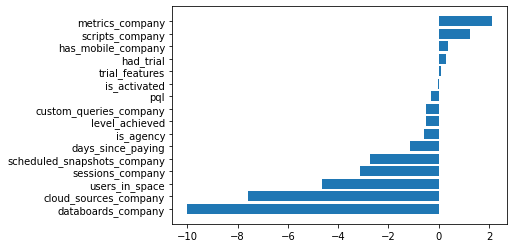

In [20]:

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = list(X2.columns)
svm = svm.SVC(kernel='linear')
svm.fit(X2, np.ravel(Y2))
f_importances(svm.coef_[0], features_names)

### KNN

In [21]:
"""KNN"""

k_list = list(range(1,50))
f1_1 = []
f1_2 = []
acc_1 = []
acc_2 = []
for k in k_list:
    print("working with k: ", k)
    clf = KNeighborsClassifier(n_neighbors=k)
    scores1 = cross_val_score(clf, X1, np.ravel(Y1), cv=10)
    scores2 = cross_val_score(clf, X2, np.ravel(Y2), cv=10)
    scores3 = cross_val_score(clf, X1, np.ravel(Y1), scoring = "f1", cv=10)
    scores4 = cross_val_score(clf, X2, np.ravel(Y2), scoring = "f1", cv=10)
    
    f1_1.append(np.mean(scores3))
    f1_2.append(np.mean(scores4))
    acc_1.append(np.mean(scores1))
    acc_2.append(np.mean(scores2))
    
    
    print("#############################################################################")
    print("accuracy score with events and with k= {}: {}".format(k,  np.mean(scores1)) )
    print("accuracy score without events and with k= {}: {}".format(k, np.mean(scores2)))
    print("F1 score with events and with k= {}: {}".format(k,  np.mean(scores3)) )
    print("F1 score without events and with k= {}: {}".format(k, np.mean(scores4)))
print("end")


working with k:  1
#############################################################################
accuracy score with events and with k= 1: 0.5867796610169492
accuracy score without events and with k= 1: 0.5925423728813559
F1 score with events and with k= 1: 0.48202969607572366
F1 score without events and with k= 1: 0.4934248402553825
working with k:  2
#############################################################################
accuracy score with events and with k= 2: 0.6254237288135593
accuracy score without events and with k= 2: 0.6383050847457626
F1 score with events and with k= 2: 0.35050183186677164
F1 score without events and with k= 2: 0.38906392087838515
working with k:  3
#############################################################################
accuracy score with events and with k= 3: 0.631186440677966
accuracy score without events and with k= 3: 0.6352542372881358
F1 score with events and with k= 3: 0.5207529207696701
F1 score without events and with k= 3: 0.5300514810

#############################################################################
accuracy score with events and with k= 26: 0.6538983050847456
accuracy score without events and with k= 26: 0.652542372881356
F1 score with events and with k= 26: 0.4842693349475381
F1 score without events and with k= 26: 0.4856558943591837
working with k:  27
#############################################################################
accuracy score with events and with k= 27: 0.6559322033898305
accuracy score without events and with k= 27: 0.6505084745762713
F1 score with events and with k= 27: 0.518624183727529
F1 score without events and with k= 27: 0.5124183724083815
working with k:  28
#############################################################################
accuracy score with events and with k= 28: 0.6552542372881356
accuracy score without events and with k= 28: 0.6457627118644067
F1 score with events and with k= 28: 0.4831492292808911
F1 score without events and with k= 28: 0.4776221251321485
wo

#############################################################################
accuracy score with events and with k= 51: 0.6538983050847458
accuracy score without events and with k= 51: 0.6566101694915255
F1 score with events and with k= 51: 0.46457711917209527
F1 score without events and with k= 51: 0.4730128334507474
working with k:  52
#############################################################################
accuracy score with events and with k= 52: 0.6538983050847457
accuracy score without events and with k= 52: 0.6576271186440679
F1 score with events and with k= 52: 0.4446592359905008
F1 score without events and with k= 52: 0.4566924782858557
working with k:  53
#############################################################################
accuracy score with events and with k= 53: 0.6518644067796611
accuracy score without events and with k= 53: 0.6525423728813559
F1 score with events and with k= 53: 0.46111973972879783
F1 score without events and with k= 53: 0.465912193918286

#############################################################################
accuracy score with events and with k= 76: 0.6450847457627119
accuracy score without events and with k= 76: 0.651186440677966
F1 score with events and with k= 76: 0.4097624391151344
F1 score without events and with k= 76: 0.422043691734172
working with k:  77
#############################################################################
accuracy score with events and with k= 77: 0.6457627118644067
accuracy score without events and with k= 77: 0.6491525423728813
F1 score with events and with k= 77: 0.42443788950663486
F1 score without events and with k= 77: 0.4327529771482651
working with k:  78
#############################################################################
accuracy score with events and with k= 78: 0.648135593220339
accuracy score without events and with k= 78: 0.6522033898305084
F1 score with events and with k= 78: 0.4165873218013556
F1 score without events and with k= 78: 0.42471291049875115
w

In [22]:
print("max acc score is: ", max(acc_1))
index = acc_1.index(max(acc_1))
print("at k= ", k_list[index])

max acc score is:  0.6633898305084746
at k=  14


### Gaussian Process

In [23]:
"""GAUSSIAN PROCESS - takes very long"""
#kernel = 1.0 * RBF(1.0)
#gpc = GaussianProcessClassifier(kernel=kernel, random_state=0)
#print(1)
#scores1 = cross_val_score(gpc, X1, np.ravel(Y1), cv=10)
#print(2)
#scores2 = cross_val_score(gpc, X2, np.ravel(Y2), cv=10)
#scores3 = cross_val_score(gpc, X1, np.ravel(Y1), scoring = "f1", cv=10)
#scores4 = cross_val_score(gpc, X2, np.ravel(Y2), scoring = "f1", cv=10)
    
#f1_1.append(np.mean(scores3))
#f1_2.append(np.mean(scores4))
#acc_1.append(np.mean(scores1))
#acc_2.append(np.mean(scores2))
    
    
#print("#############################################################################")
#print("accuracy score with events: {}".format(np.mean(scores1) ))
#print("accuracy score without events: {}".format(np.mean(scores2) ))
#print("F1 score with events: {}".format(np.mean(scores3)) )
#print("F1 score without events: {}".format(np.mean(scores4)))
#print("end")


'GAUSSIAN PROCESS - takes very long'

### Random Forest

In [24]:
"""RANDOM FOREST"""
k_list = list(range(1,50))
f1_1 = []
f1_2 = []
acc_1 = []
acc_2 = []
for k in k_list:
    print("working with {} trees".format(k))
    clf=RandomForestClassifier(n_estimators=k)
    scores1 = cross_val_score(clf, X1, np.ravel(Y1), cv=10)
    scores2 = cross_val_score(clf, X2, np.ravel(Y2), cv=10)
    scores3 = cross_val_score(clf, X1, np.ravel(Y1), scoring = "f1", cv=10)
    scores4 = cross_val_score(clf, X2, np.ravel(Y2), scoring = "f1", cv=10)

    f1_1.append(np.mean(scores3))
    f1_2.append(np.mean(scores4))
    acc_1.append(np.mean(scores1))
    acc_2.append(np.mean(scores2))
    
    
    print("#############################################################################")
    print("accuracy score with events and with k= {}: {}".format(k,  np.mean(scores1)) )
    print("accuracy score without events and with k= {}: {}".format(k, np.mean(scores2)))
    print("F1 score with events and with k= {}: {}".format(k,  np.mean(scores3)) )
    print("F1 score without events and with k= {}: {}".format(k, np.mean(scores4)))
print("end")
   


working with 1 trees
#############################################################################
accuracy score with events and with k= 1: 0.6691525423728814
accuracy score without events and with k= 1: 0.6698305084745761
F1 score with events and with k= 1: 0.6057606294003888
F1 score without events and with k= 1: 0.5803655868640839
working with 2 trees
#############################################################################
accuracy score with events and with k= 2: 0.6915254237288135
accuracy score without events and with k= 2: 0.7074576271186441
F1 score with events and with k= 2: 0.5057869796994319
F1 score without events and with k= 2: 0.5379466508601474
working with 3 trees
#############################################################################
accuracy score with events and with k= 3: 0.7149152542372881
accuracy score without events and with k= 3: 0.7061016949152543
F1 score with events and with k= 3: 0.6256986063450658
F1 score without events and with k= 3: 0.609980

#############################################################################
accuracy score with events and with k= 26: 0.7738983050847457
accuracy score without events and with k= 26: 0.7518644067796609
F1 score with events and with k= 26: 0.6683611749905025
F1 score without events and with k= 26: 0.6483431869568467
working with 27 trees
#############################################################################
accuracy score with events and with k= 27: 0.7677966101694915
accuracy score without events and with k= 27: 0.7515254237288136
F1 score with events and with k= 27: 0.6834738010467065
F1 score without events and with k= 27: 0.6528831130461851
working with 28 trees
#############################################################################
accuracy score with events and with k= 28: 0.7735593220338982
accuracy score without events and with k= 28: 0.7620338983050847
F1 score with events and with k= 28: 0.6803570719116492
F1 score without events and with k= 28: 0.6483172989175

In [26]:
print("max acc score is: ", max(acc_2))
index = acc_2.index(max(acc_2))
print("at k= ", k_list[index])
print("with f1 score: ", f1_2[index])

max acc score is:  0.7671186440677966
at k=  35
with f1 score:  0.6474500460783522


In [48]:
clf=RandomForestClassifier(n_estimators=35) #max
clf.fit(X2, np.ravel(Y2))
value= clf.feature_importances_
feature = list(X2.columns)

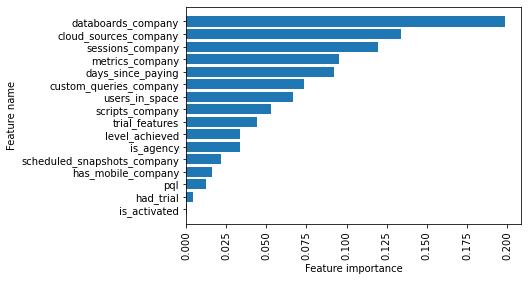

In [57]:
z = list(zip(value,feature))

z.sort()

value = [v for (v,f) in z]
feature = [f for (v,f) in z]

plt.barh(feature,value)
plt.xticks(rotation=90)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.show()


### Naive Bayes

In [61]:
"""NAIVE BAYES"""

gnb = GaussianNB()
scores1 = cross_val_score(gnb, X1, np.ravel(Y1), cv=10)
scores2 = cross_val_score(gnb, X2, np.ravel(Y2), cv=10)
scores3 = cross_val_score(gnb, X1, np.ravel(Y1), scoring = "f1", cv=10)
scores4 = cross_val_score(gnb, X2, np.ravel(Y2), scoring = "f1", cv=10)
    
print("accuracy score with events: {}".format(np.mean(scores1) ))
print("accuracy score without events: {}".format(np.mean(scores2) ))
print("F1 score with events: {}".format(np.mean(scores3)) )
print("F1 score without events: {}".format(np.mean(scores4)))


accuracy score with events: 0.5559322033898305
accuracy score without events: 0.6094915254237289
F1 score with events: 0.6083015246401479
F1 score without events: 0.6332716547747379


## Problem 2: Became paying